## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


## Step 2: Load the Dataset

In [2]:
df = pd.read_csv('fraudTrain.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Step 3: Data Cleaning

In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Check for duplicate rows
df.duplicated().sum()

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


Step 4: Data Exploration and Visualization

         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.

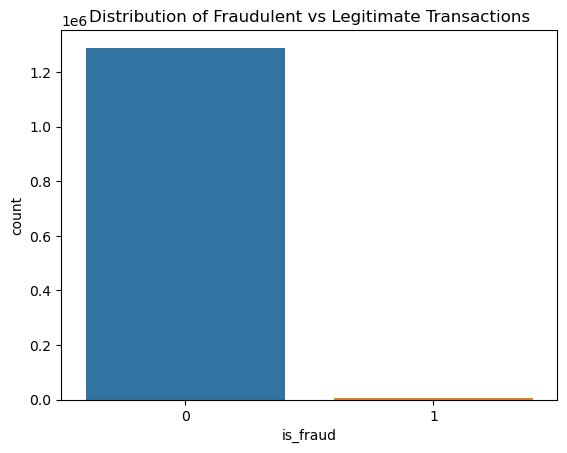

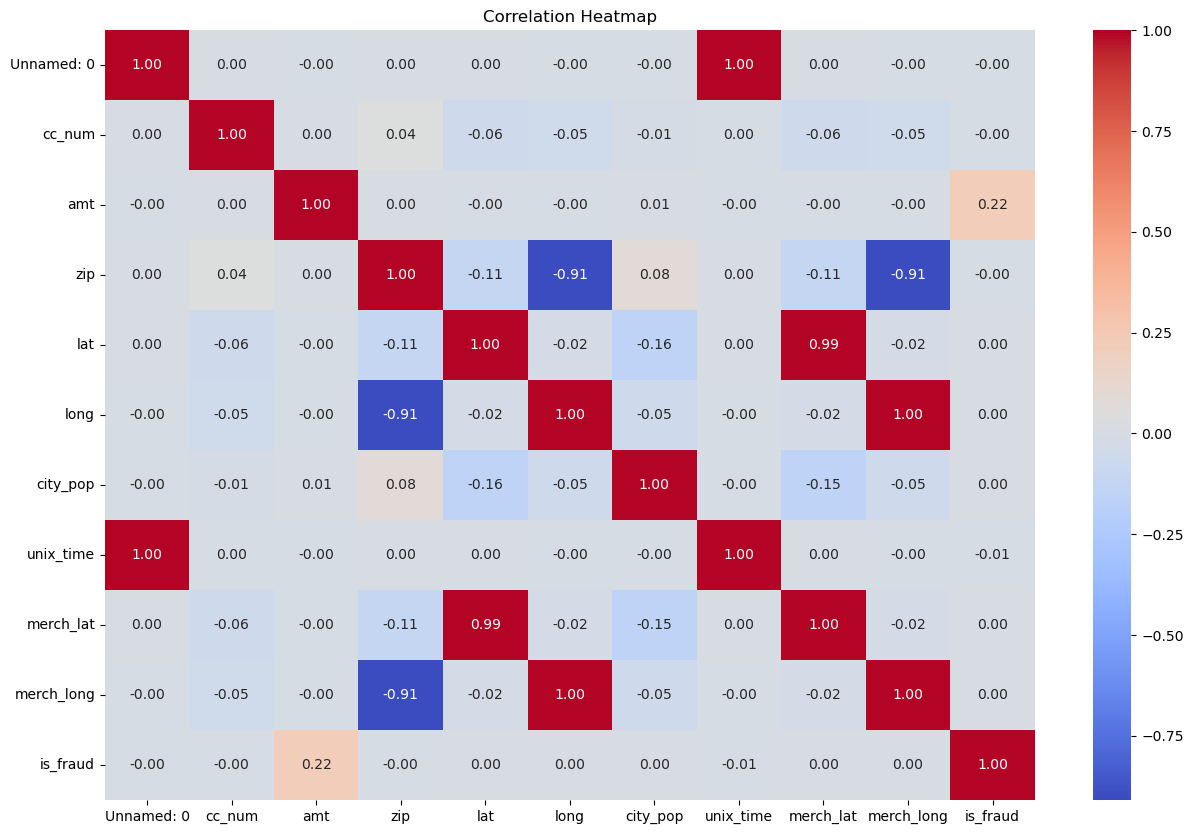

In [4]:
# Display basic statistics of the dataset
print(df.describe())

# Visualize the distribution of the target variable (is_fraud)
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent vs Legitimate Transactions')
plt.show()

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Step 5: Data Preprocessing

Feature Engineering

In [5]:
# Convert categorical columns to numerical
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# Drop columns that are not needed
df.drop(['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1, inplace=True)


Feature Selection

In [6]:
# Select features and target variable
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Encode categorical variables
X = pd.get_dummies(X)


Data Transformation

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 6: Splitting the Data

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 7: Model Selection and Training

In [9]:
# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Step 8: Model Evaluation

In [12]:
#Logistic Regression
# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print('Logistic Regression Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Precision:', precision_score(y_test, y_pred_lr))
print('Recall:', recall_score(y_test, y_pred_lr))
print('F1 Score:', f1_score(y_test, y_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))

Logistic Regression Metrics:
Accuracy: 0.9937802456282414
Precision: 0.22485207100591717
Recall: 0.025
F1 Score: 0.04499703966844287
Confusion Matrix:
 [[257684    131]
 [  1482     38]]


In [13]:
#Decision Tree
# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print('Decision Tree Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt))
print('Recall:', recall_score(y_test, y_pred_dt))
print('F1 Score:', f1_score(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))

Decision Tree Metrics:
Accuracy: 0.9978521988933233
Precision: 0.8096463022508038
Recall: 0.8282894736842106
F1 Score: 0.8188617886178862
Confusion Matrix:
 [[257519    296]
 [   261   1259]]


In [14]:
#Random Forest
# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print('Random Forest Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))

Random Forest Metrics:
Accuracy: 0.9979061831222165
Precision: 0.988988988988989
Recall: 0.65
F1 Score: 0.7844382691544264
Confusion Matrix:
 [[257804     11]
 [   532    988]]


Summarize and compare the evaluation metrics

In [15]:
# Summarize and compare the evaluation metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]
precision = [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf)]
recall = [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_rf)]
f1 = [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf)]

eval_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
print(eval_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.993780   0.224852  0.025000  0.044997
1        Decision Tree  0.997852   0.809646  0.828289  0.818862
2        Random Forest  0.997906   0.988989  0.650000  0.784438


## Model Testing

In [16]:
# Load the test dataset
test_df = pd.read_csv('fraudTest.csv')

# Convert categorical columns to numerical
test_df['gender'] = test_df['gender'].map({'M': 0, 'F': 1})
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['day'] = test_df['trans_date_trans_time'].dt.day
test_df['month'] = test_df['trans_date_trans_time'].dt.month
test_df['year'] = test_df['trans_date_trans_time'].dt.year
test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['age'] = test_df['trans_date_trans_time'].dt.year - test_df['dob'].dt.year

# Drop columns that are not needed
test_df.drop(['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1, inplace=True)

# Select features and target variable
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

# Encode categorical variables
X_test = pd.get_dummies(X_test)

# Standardize the features
X_test_scaled = scaler.transform(X_test)

# Predict on the test set using the Random Forest model (selected model)
y_pred_test = rf_model.predict(X_test_scaled)

# Evaluate the model on the test set
print('Random Forest Metrics on Test Set:')
print('Accuracy:', accuracy_score(y_test, y_pred_test))
print('Precision:', precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1 Score:', f1_score(y_test, y_pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))


Random Forest Metrics on Test Set:
Accuracy: 0.9982923024046325
Precision: 0.9791666666666666
Recall: 0.5696969696969697
F1 Score: 0.7203065134099617
Confusion Matrix:
 [[553548     26]
 [   923   1222]]


## Model Deployment

In [18]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [19]:
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']